# Baseline Model for Twitter Sentiment Analysis

This model will use Multinomial Naive Bayes with tf/idf to classify the tweets.

It will reduce the dimensionality of the feature set by adjusting the minimum document frequency of words, in an attempt to get better results.

# Imports and Constants

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
from sklearn.feature_extraction.text import TfidfTransformer 

In [2]:
DATA_FILE_PATH = 'data/crowdflower-brands-and-product-emotions/data/'
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

# Load Data

In [3]:
df = pd.read_csv(DATA_FILE_PATH + TOKENIZED_DATA_FILE_NAME)

In [4]:
df.head()

tweet_text  \
0             i have a g iphone after  hrs tweeting at #riseaustin it was dead  i need to upgrade plugin stations at #sxsw   
1   know about   awesome ipad/iphone app that you'll likely appreciate for its design also they're giving free ts at #sxsw   
2                                                         can not wait for #ipad  also they should sale them down at #sxsw   
3                                              i hope this year's festival isn't as crashy as this year's iphone app #sxsw   
4       great stuff on fri #sxsw: marissa mayer (google) tim o'reilly (tech books/conferences)  matt mullenweg (wordpress)   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   Negative emotion   
1                                   Positive emotion   
2                                   Positive emotion   
3                                   Negative emotion   
4                                   Positive emotion   

                                                                                                                                                                              tokens  
0         ['i', 'have', 'a', 'g', 'iphone', 'after', 'hrs', 'tweeting', 'at', '#riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', '#sxsw']  
1  ['know', 'about', 'awesome', 'ipad', 'iphone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', 'also', "they're", 'giving', 'free', 'ts', 'at', '#sxsw']  
2                                                                            ['can', 'not', 'wait', 'for', '#ipad', 'also', 'they', 'should', 'sale', 'them', 'down', 'at', '#sxsw']  
3                                                             ['i', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iphone', 'app', '#sxsw']  
4                        ['great', 'stuff', 'on', 'fri', '#sxsw', 'marissa', 'mayer', 'google', 'tim', "o'reilly", 'tech', 'books', 'conferences', 'matt', 'mullenweg', 'wordpress']

In [5]:
data = df[['tokens', 'is_there_an_emotion_directed_at_a_brand_or_product']]

In [6]:
data.head()

tokens  \
0         ['i', 'have', 'a', 'g', 'iphone', 'after', 'hrs', 'tweeting', 'at', '#riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', '#sxsw']   
1  ['know', 'about', 'awesome', 'ipad', 'iphone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', 'also', "they're", 'giving', 'free', 'ts', 'at', '#sxsw']   
2                                                                            ['can', 'not', 'wait', 'for', '#ipad', 'also', 'they', 'should', 'sale', 'them', 'down', 'at', '#sxsw']   
3                                                             ['i', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iphone', 'app', '#sxsw']   
4                        ['great', 'stuff', 'on', 'fri', '#sxsw', 'marissa', 'mayer', 'google', 'tim', "o'reilly", 'tech', 'books', 'conferences', 'matt', 'mullenweg', 'wordpress']   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

# Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['is_there_an_emotion_directed_at_a_brand_or_product'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['is_there_an_emotion_directed_at_a_brand_or_product'])

In [8]:
X_train.shape

(6855,)

In [9]:
X_test.shape

(1714,)

# Encode Labels

In [10]:
le = LabelEncoder()

In [11]:
y_train_enc = le.fit_transform(y_train)

In [12]:
y_test_enc = le.transform(y_test)

# Evaluate Adjustments to Minimum Document Frequency

In [17]:
def train_and_eval_model(min_df):
    """
    Train and Evaluate and Bag of Words Representation with a Naive Bayes
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([
    ('bow',CountVectorizer(min_df=min_df)),  # bag of words
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),  # train on bag of words vectors w/ Naive Bayes classifier
    ])
    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')
    
    lb = LabelBinarizer()
    lb.fit(y_test_enc)
    y_test_multi = lb.transform(y_test_enc)
    y_hat_test_multi = pipeline.predict_proba(X_test)
    
    evaluation_functions.pr_curves(y_test_multi, y_hat_test_multi, le.classes_)
    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
        
    f1_scores = f1_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, train_accuracy, test_accuracy]),
                             f1_scores)
   
    return test_results
    

MINIMUM DOCUMENT FREQUENCY = 1

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.02      0.04       436
No emotion toward brand or product       0.70      0.99      0.82      4124
                  Positive emotion       0.91      0.41      0.57      2295

                          accuracy                           0.73      6855
                         macro avg       0.87      0.47      0.48      6855
                      weighted avg       0.79      0.73      0.69      6855



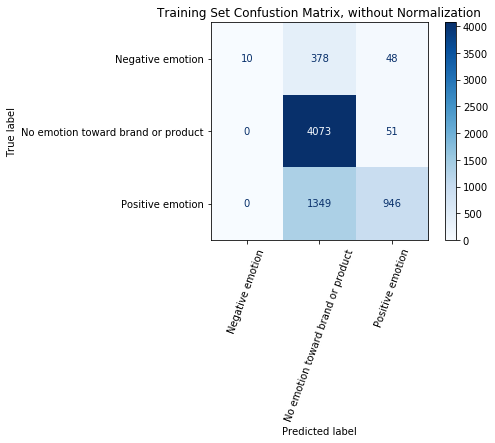

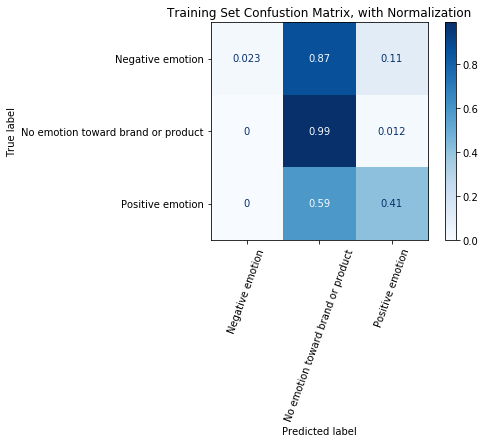

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.67      0.02      0.04       109
No emotion toward brand or product       0.65      0.96      0.77      1031
                  Positive emotion       0.71      0.22      0.34       574

                          accuracy                           0.65      1714
                         macro avg       0.67      0.40      0.38      1714
                      weighted avg       0.67      0.65      0.58      1714



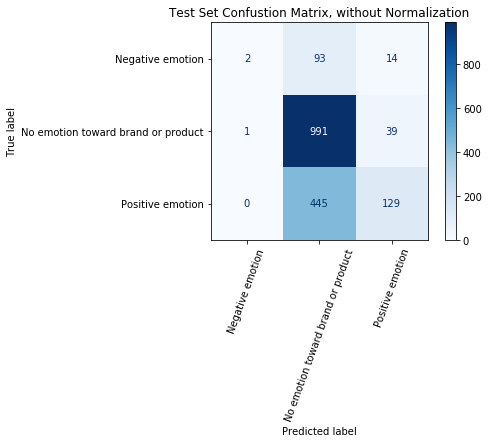

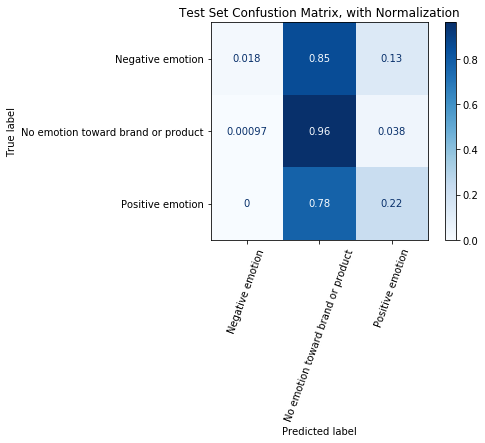

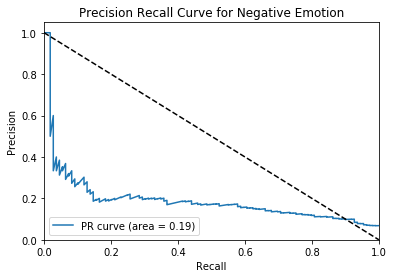

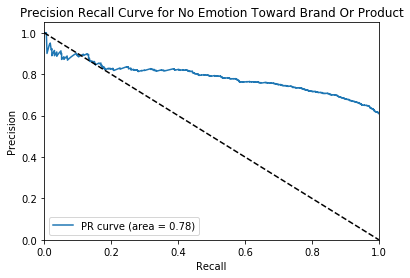

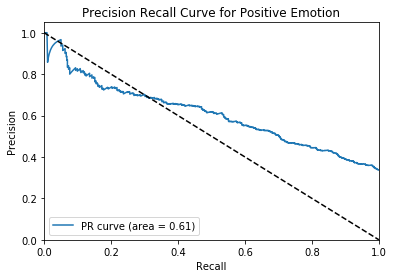

MINIMUM DOCUMENT FREQUENCY = 2

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.06      0.11       436
No emotion toward brand or product       0.72      0.97      0.82      4124
                  Positive emotion       0.84      0.46      0.59      2295

                          accuracy                           0.74      6855
                         macro avg       0.85      0.50      0.51      6855
                      weighted avg       0.78      0.74      0.70      6855



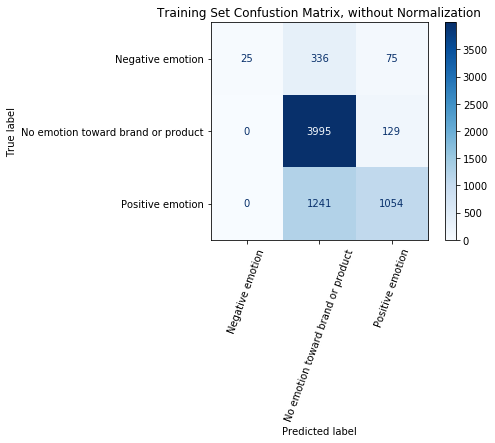

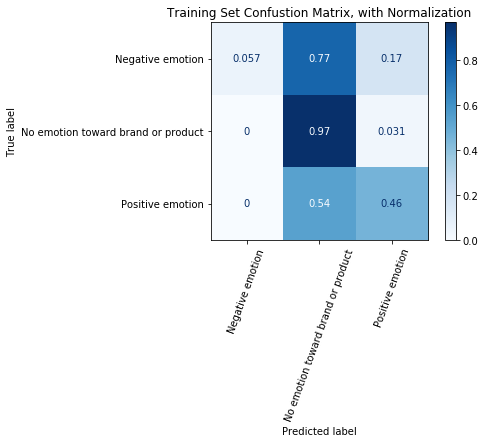

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.67      0.02      0.04       109
No emotion toward brand or product       0.66      0.94      0.77      1031
                  Positive emotion       0.67      0.30      0.41       574

                          accuracy                           0.66      1714
                         macro avg       0.67      0.42      0.41      1714
                      weighted avg       0.66      0.66      0.61      1714



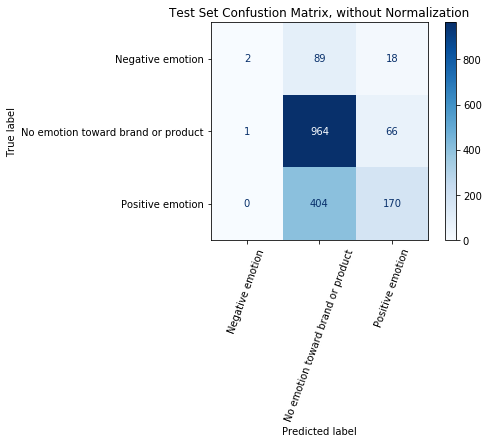

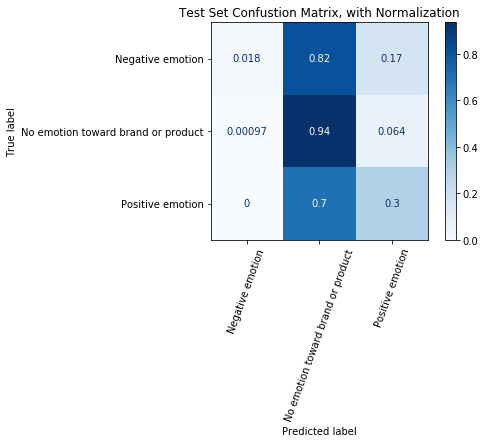

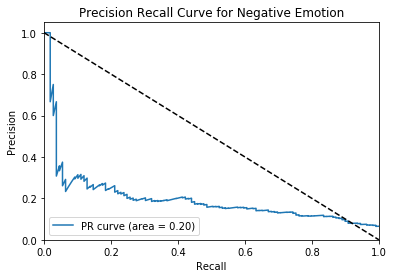

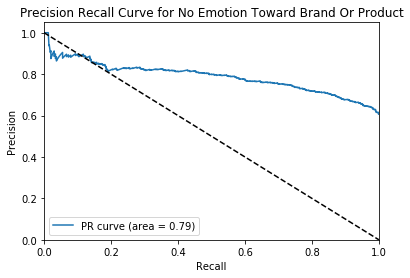

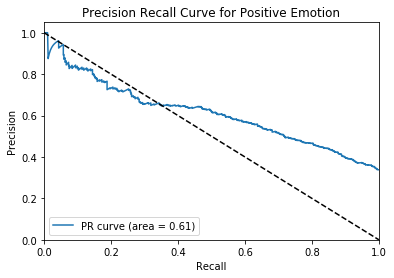

MINIMUM DOCUMENT FREQUENCY = 3

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.97      0.07      0.12       436
No emotion toward brand or product       0.72      0.95      0.82      4124
                  Positive emotion       0.80      0.48      0.60      2295

                          accuracy                           0.74      6855
                         macro avg       0.83      0.50      0.51      6855
                      weighted avg       0.76      0.74      0.70      6855



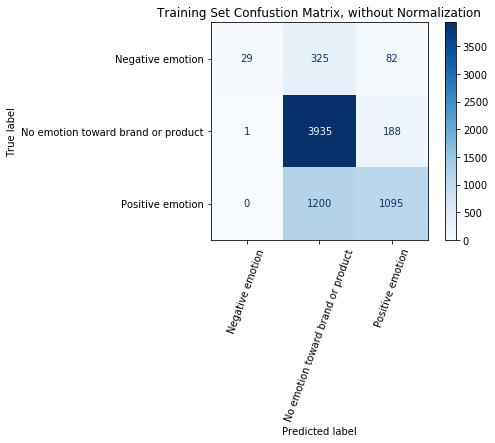

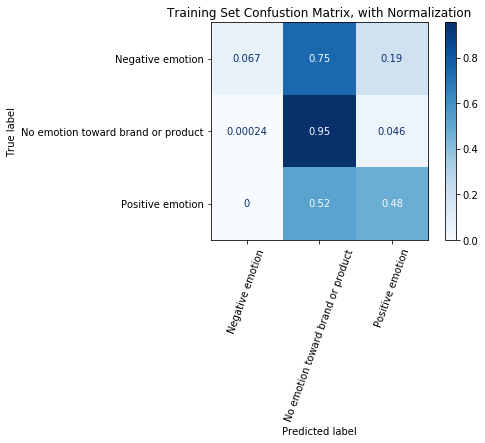

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.67      0.91      0.77      1031
                  Positive emotion       0.65      0.34      0.45       574

                          accuracy                           0.67      1714
                         macro avg       0.61      0.43      0.42      1714
                      weighted avg       0.65      0.67      0.62      1714



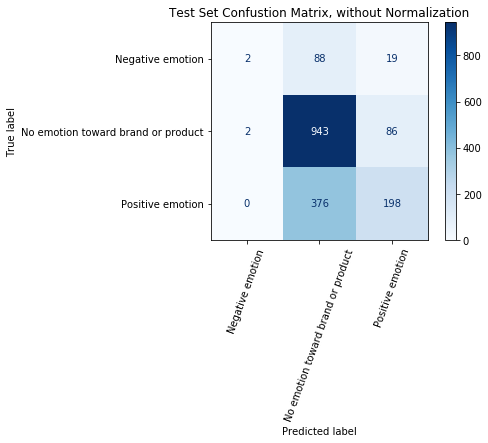

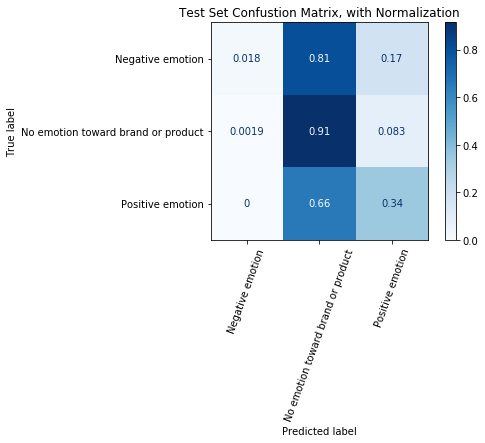

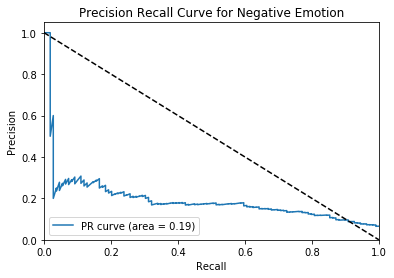

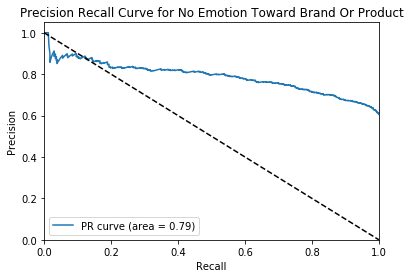

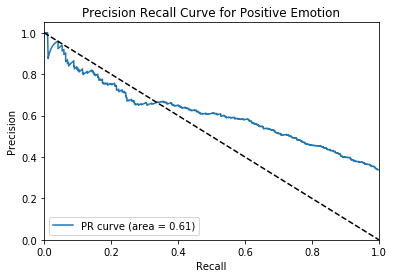

MINIMUM DOCUMENT FREQUENCY = 4

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.97      0.07      0.14       436
No emotion toward brand or product       0.72      0.94      0.82      4124
                  Positive emotion       0.77      0.47      0.59      2295

                          accuracy                           0.73      6855
                         macro avg       0.82      0.50      0.51      6855
                      weighted avg       0.75      0.73      0.70      6855



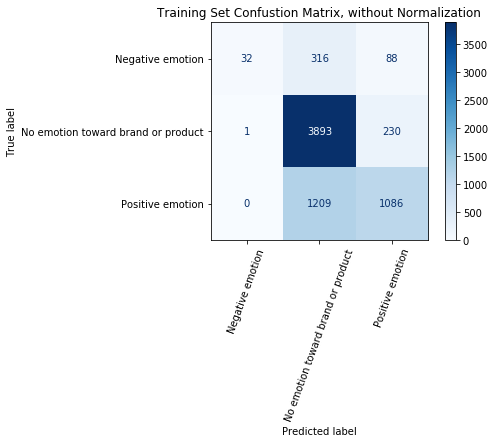

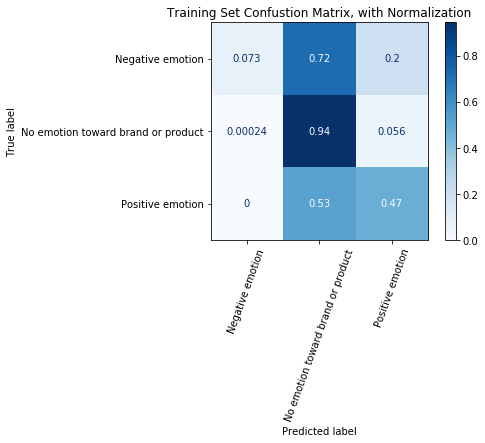

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.60      0.03      0.05       109
No emotion toward brand or product       0.68      0.90      0.77      1031
                  Positive emotion       0.63      0.37      0.47       574

                          accuracy                           0.67      1714
                         macro avg       0.64      0.43      0.43      1714
                      weighted avg       0.66      0.67      0.63      1714



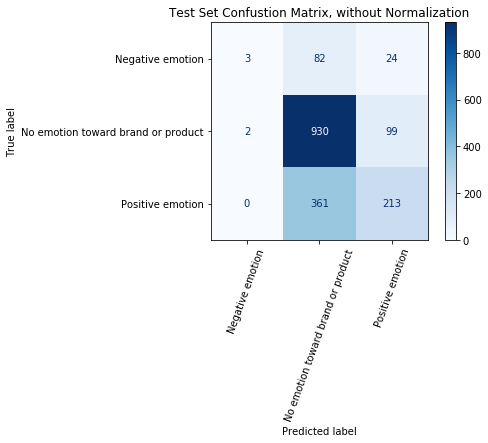

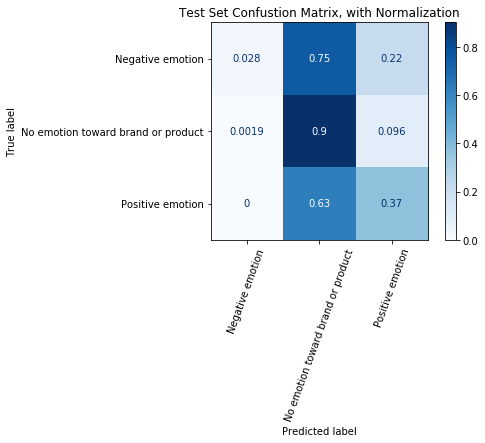

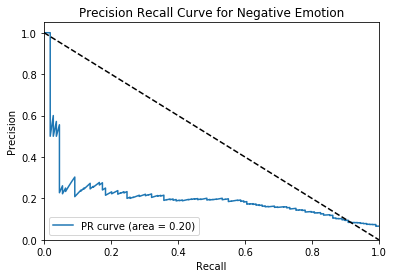

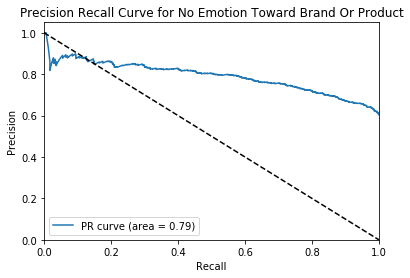

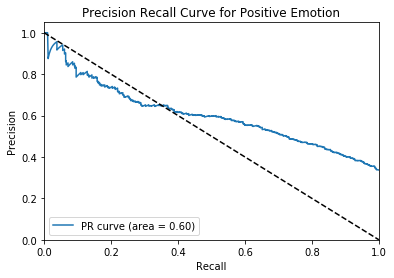

MINIMUM DOCUMENT FREQUENCY = 5

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.96      0.06      0.12       436
No emotion toward brand or product       0.71      0.94      0.81      4124
                  Positive emotion       0.76      0.46      0.57      2295

                          accuracy                           0.72      6855
                         macro avg       0.81      0.49      0.50      6855
                      weighted avg       0.74      0.72      0.69      6855



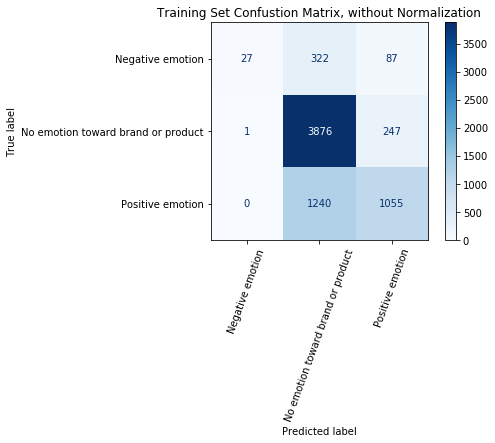

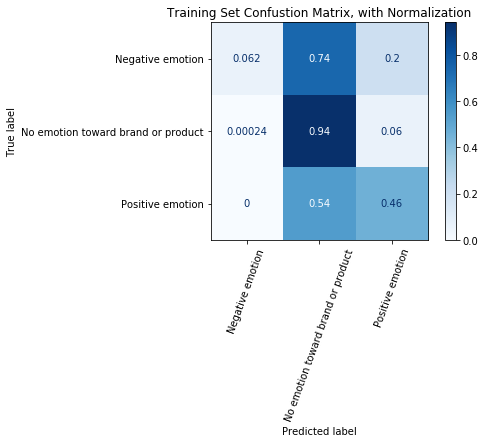

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.77      1031
                  Positive emotion       0.63      0.38      0.47       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.43      1714
                      weighted avg       0.65      0.67      0.62      1714



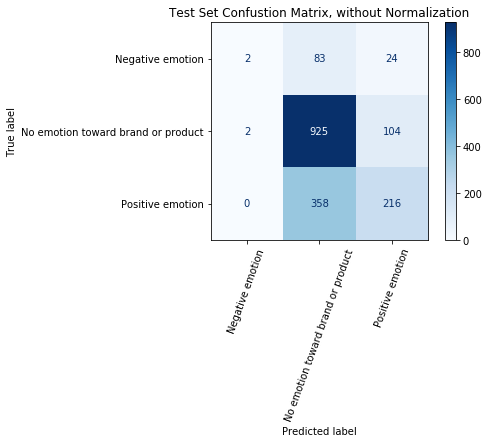

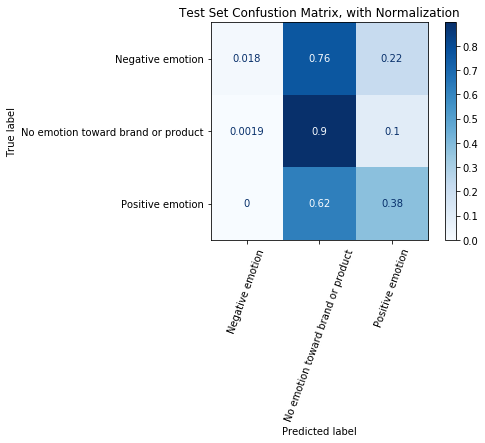

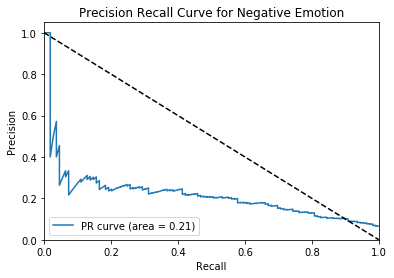

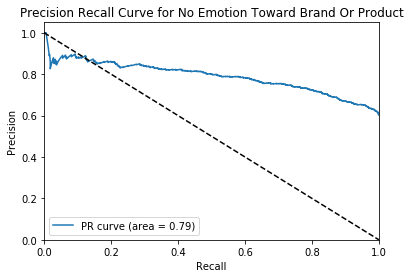

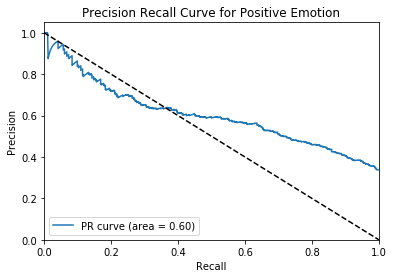

MINIMUM DOCUMENT FREQUENCY = 6

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.91      0.07      0.12       436
No emotion toward brand or product       0.71      0.94      0.81      4124
                  Positive emotion       0.75      0.45      0.56      2295

                          accuracy                           0.72      6855
                         macro avg       0.79      0.48      0.50      6855
                      weighted avg       0.74      0.72      0.68      6855



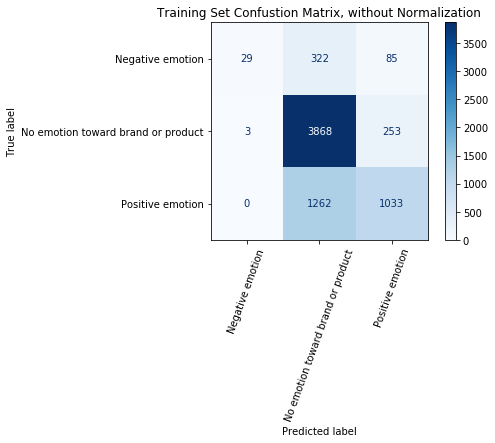

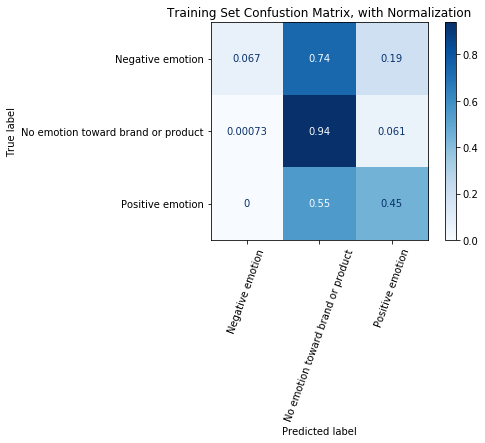

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.78      1031
                  Positive emotion       0.63      0.39      0.48       574

                          accuracy                           0.67      1714
                         macro avg       0.61      0.44      0.43      1714
                      weighted avg       0.65      0.67      0.63      1714



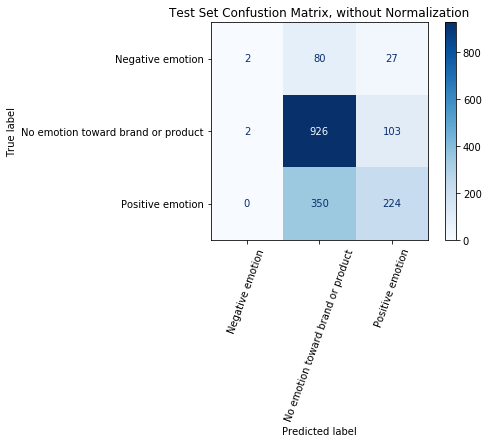

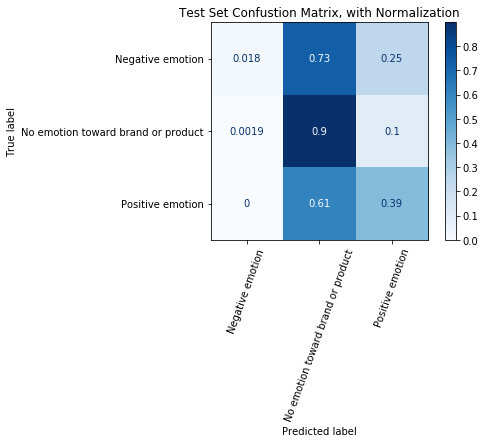

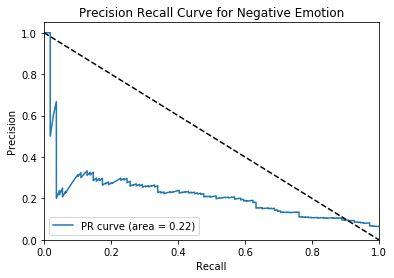

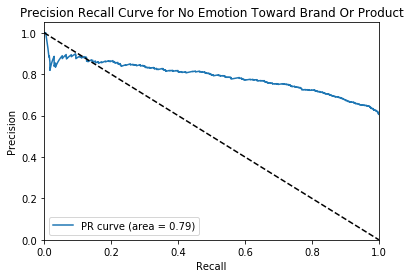

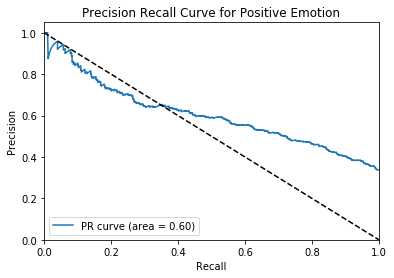

MINIMUM DOCUMENT FREQUENCY = 7

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.97      0.06      0.12       436
No emotion toward brand or product       0.71      0.94      0.81      4124
                  Positive emotion       0.74      0.45      0.56      2295

                          accuracy                           0.72      6855
                         macro avg       0.81      0.48      0.50      6855
                      weighted avg       0.74      0.72      0.68      6855



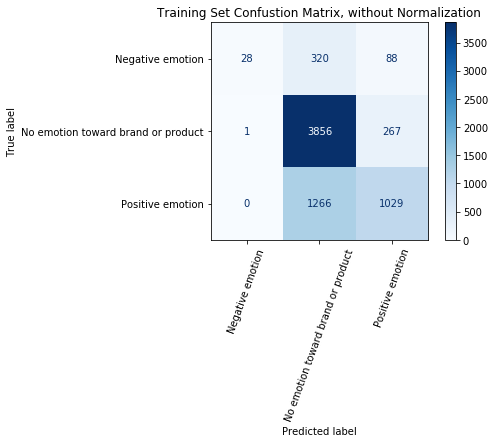

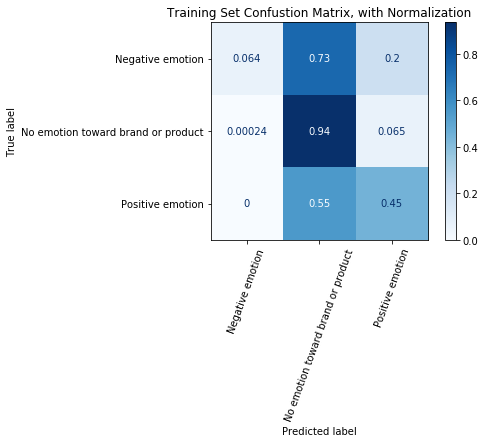

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.77      1031
                  Positive emotion       0.62      0.38      0.47       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.43      1714
                      weighted avg       0.65      0.67      0.63      1714



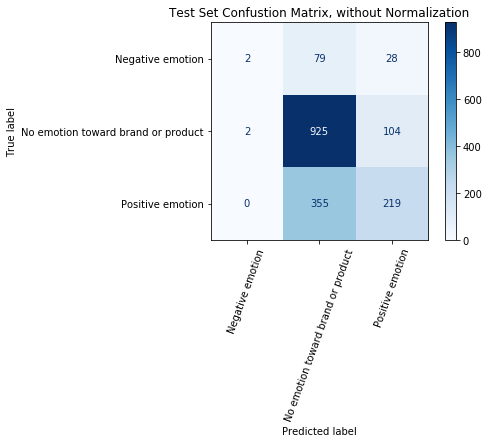

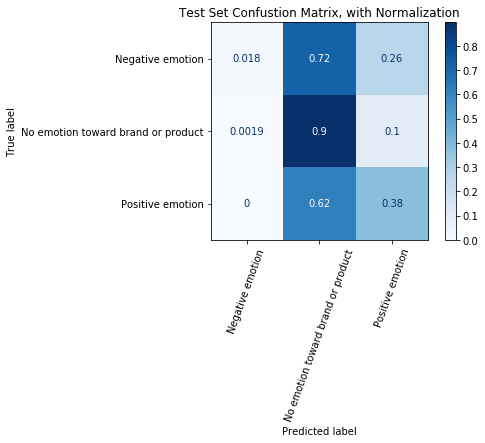

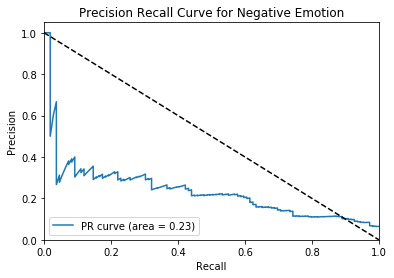

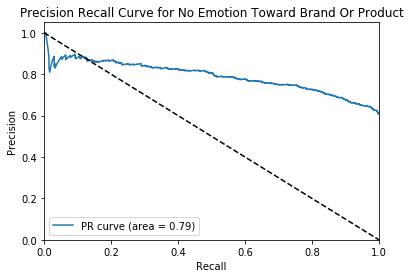

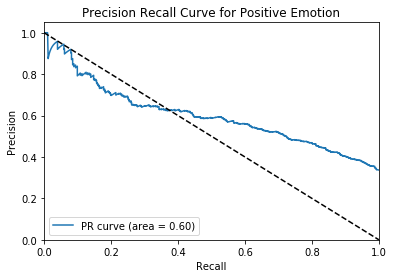

MINIMUM DOCUMENT FREQUENCY = 8

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.94      0.07      0.13       436
No emotion toward brand or product       0.71      0.93      0.80      4124
                  Positive emotion       0.74      0.44      0.55      2295

                          accuracy                           0.71      6855
                         macro avg       0.79      0.48      0.49      6855
                      weighted avg       0.73      0.71      0.68      6855



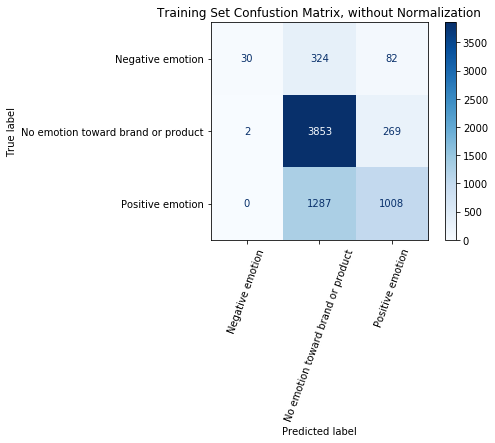

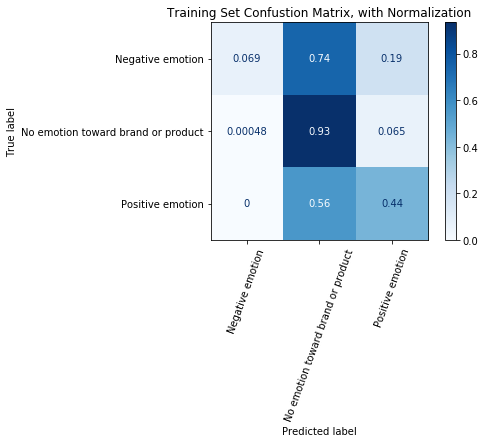

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.78      1031
                  Positive emotion       0.63      0.38      0.48       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.43      1714
                      weighted avg       0.65      0.67      0.63      1714



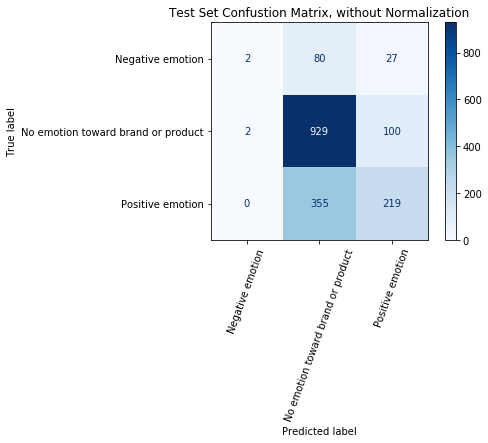

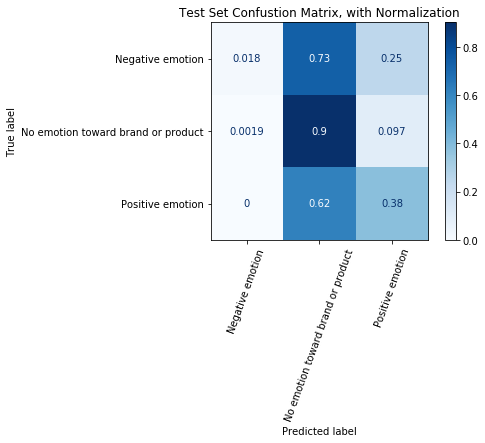

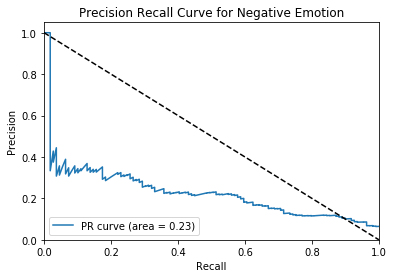

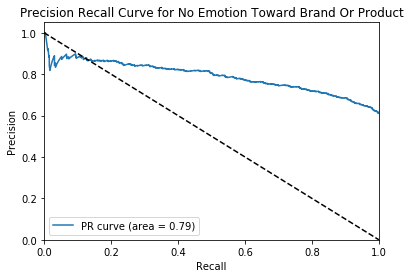

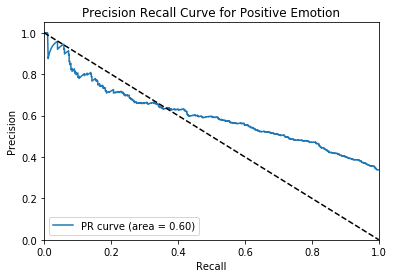

MINIMUM DOCUMENT FREQUENCY = 9

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.92      0.05      0.10       436
No emotion toward brand or product       0.70      0.93      0.80      4124
                  Positive emotion       0.73      0.43      0.54      2295

                          accuracy                           0.71      6855
                         macro avg       0.79      0.47      0.48      6855
                      weighted avg       0.73      0.71      0.67      6855



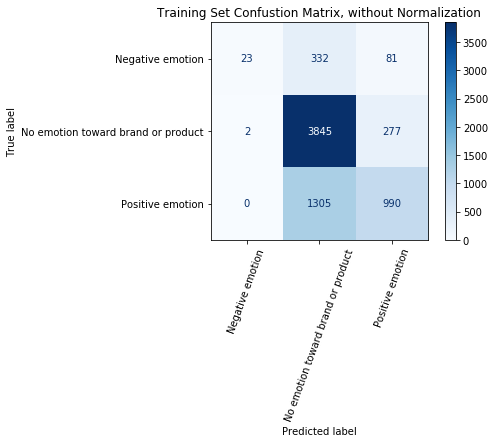

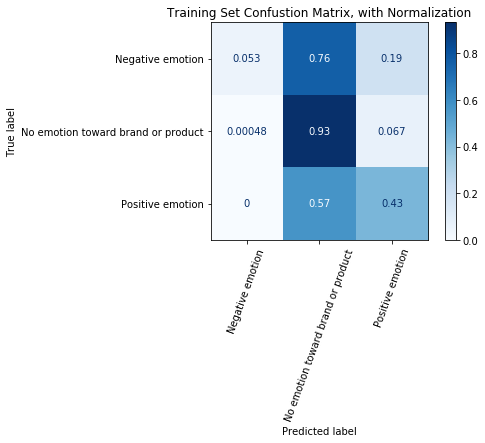

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.77      1031
                  Positive emotion       0.63      0.38      0.47       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.43      1714
                      weighted avg       0.65      0.67      0.63      1714



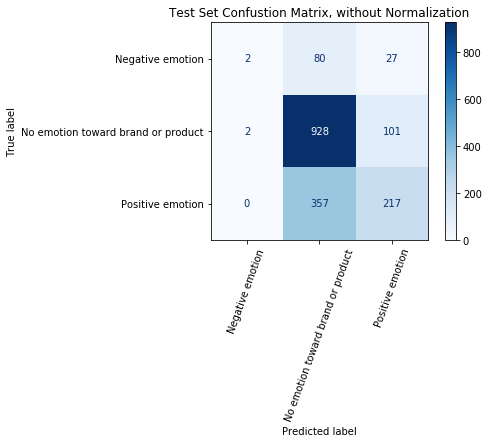

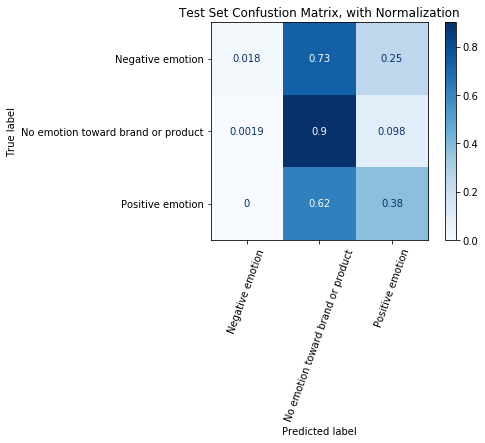

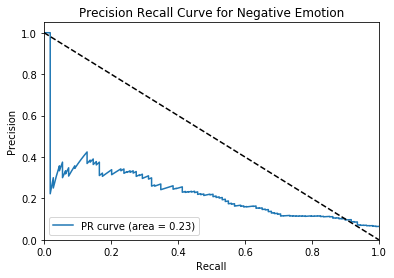

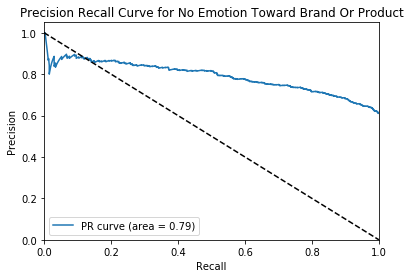

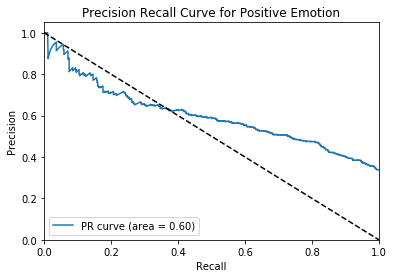

MINIMUM DOCUMENT FREQUENCY = 10

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.93      0.06      0.12       436
No emotion toward brand or product       0.70      0.93      0.80      4124
                  Positive emotion       0.73      0.42      0.54      2295

                          accuracy                           0.71      6855
                         macro avg       0.79      0.47      0.48      6855
                      weighted avg       0.72      0.71      0.67      6855



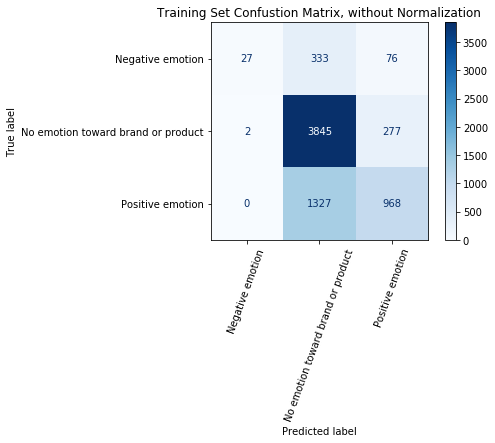

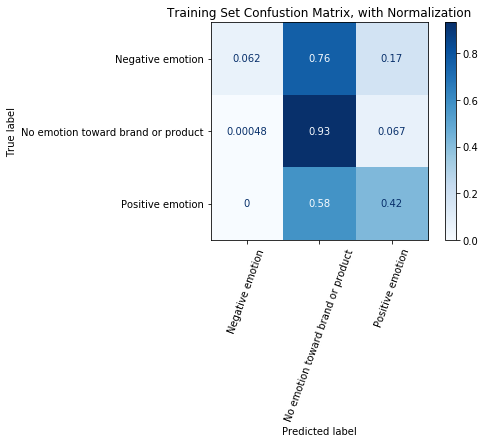

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.77      1031
                  Positive emotion       0.63      0.38      0.47       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.43      1714
                      weighted avg       0.65      0.67      0.63      1714



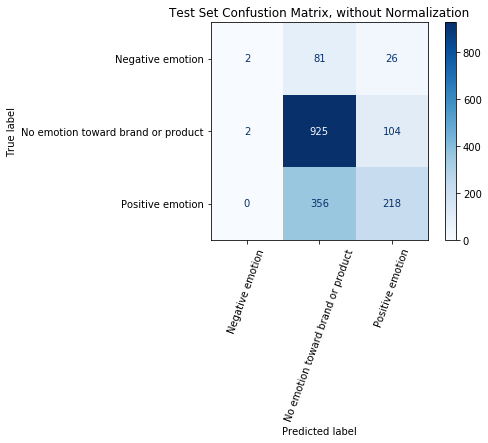

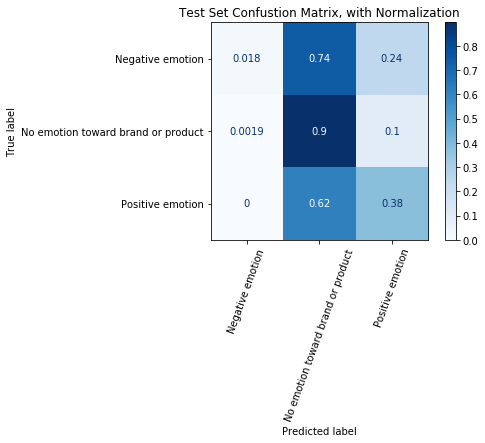

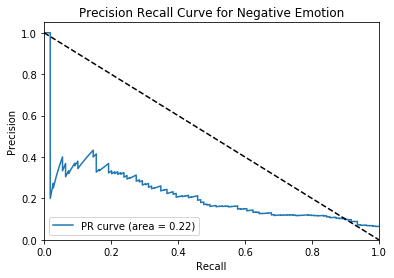

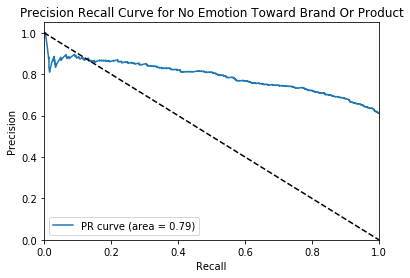

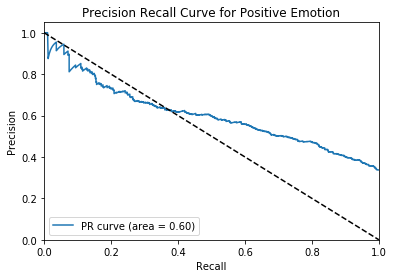

MINIMUM DOCUMENT FREQUENCY = 11

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.93      0.06      0.11       436
No emotion toward brand or product       0.70      0.93      0.80      4124
                  Positive emotion       0.73      0.42      0.53      2295

                          accuracy                           0.70      6855
                         macro avg       0.78      0.47      0.48      6855
                      weighted avg       0.72      0.70      0.66      6855



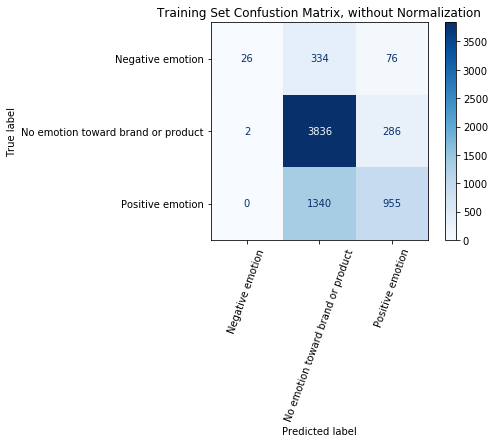

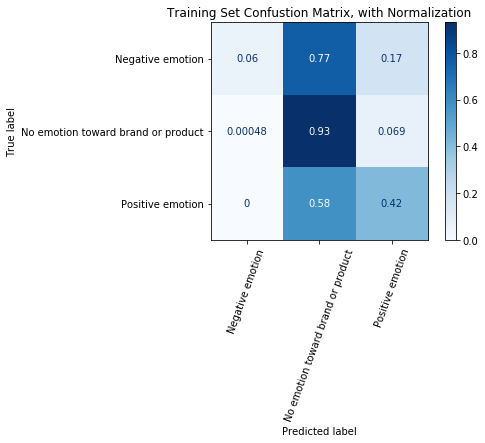

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.77      1031
                  Positive emotion       0.62      0.37      0.46       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.42      1714
                      weighted avg       0.65      0.67      0.62      1714



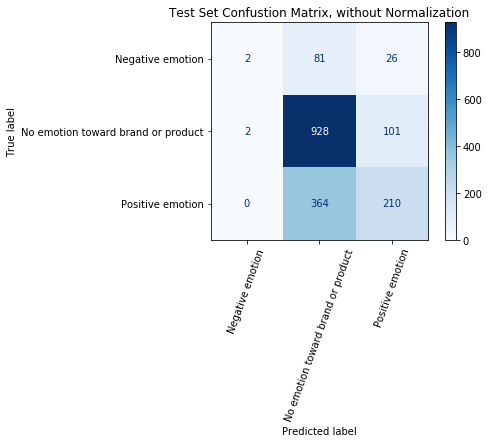

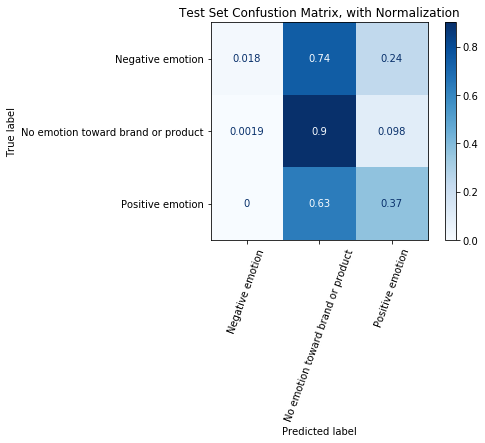

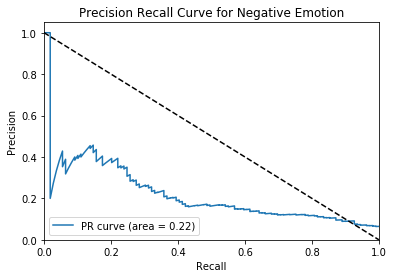

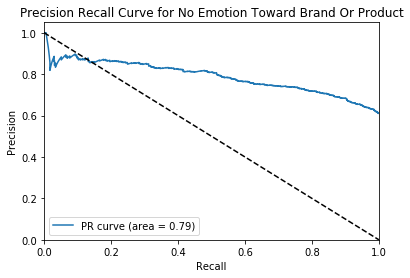

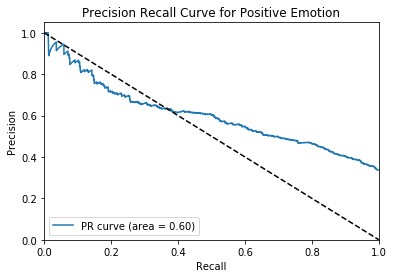

MINIMUM DOCUMENT FREQUENCY = 12

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.88      0.05      0.10       436
No emotion toward brand or product       0.69      0.93      0.80      4124
                  Positive emotion       0.72      0.41      0.52      2295

                          accuracy                           0.70      6855
                         macro avg       0.77      0.46      0.47      6855
                      weighted avg       0.72      0.70      0.66      6855



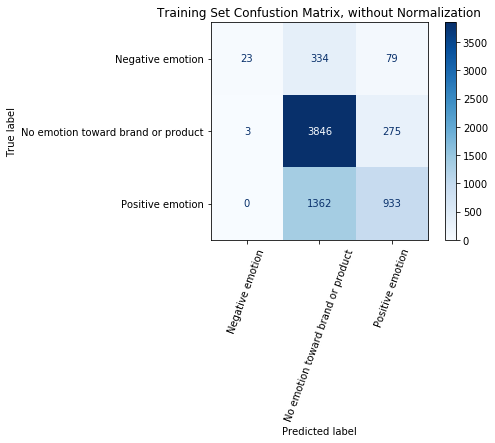

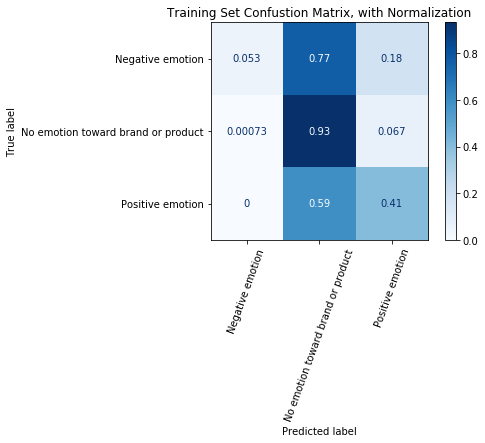

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.40      0.02      0.04       109
No emotion toward brand or product       0.67      0.90      0.77      1031
                  Positive emotion       0.63      0.36      0.46       574

                          accuracy                           0.67      1714
                         macro avg       0.57      0.43      0.42      1714
                      weighted avg       0.64      0.67      0.62      1714



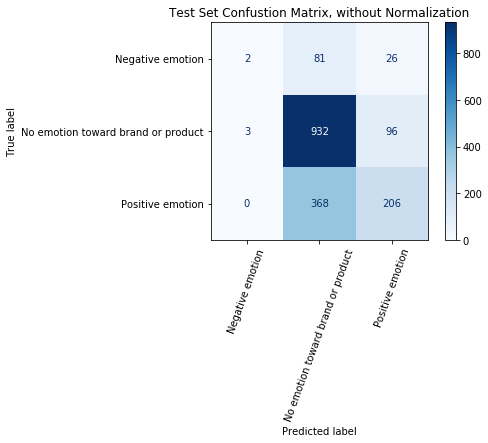

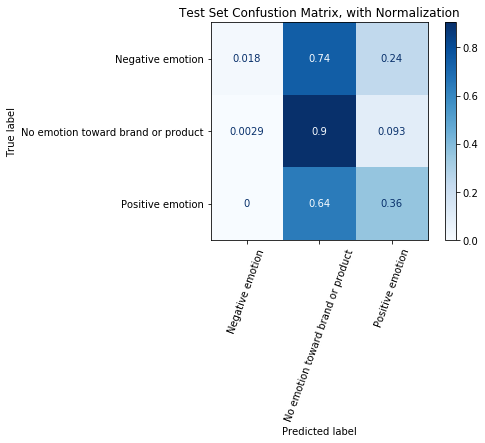

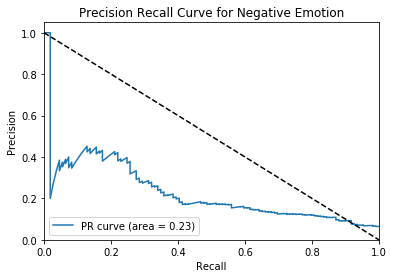

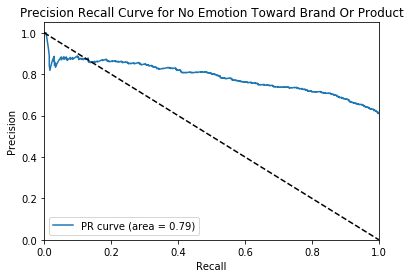

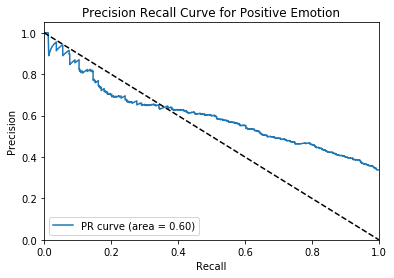

MINIMUM DOCUMENT FREQUENCY = 13

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.85      0.05      0.10       436
No emotion toward brand or product       0.69      0.93      0.79      4124
                  Positive emotion       0.72      0.40      0.51      2295

                          accuracy                           0.70      6855
                         macro avg       0.75      0.46      0.47      6855
                      weighted avg       0.71      0.70      0.65      6855



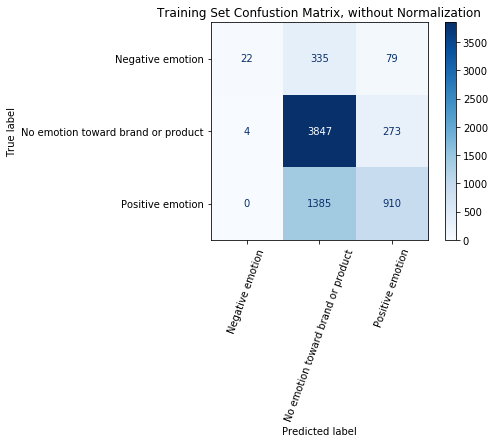

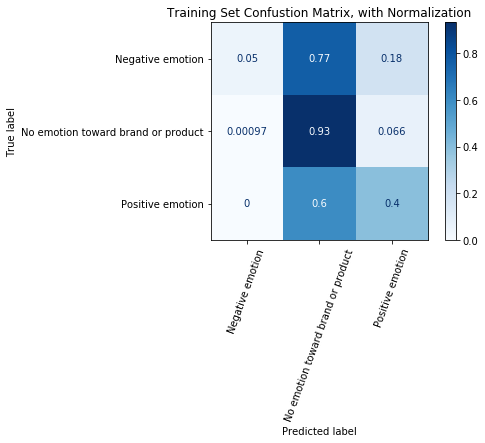

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.20      0.01      0.02       109
No emotion toward brand or product       0.67      0.90      0.77      1031
                  Positive emotion       0.62      0.35      0.45       574

                          accuracy                           0.66      1714
                         macro avg       0.50      0.42      0.41      1714
                      weighted avg       0.62      0.66      0.62      1714



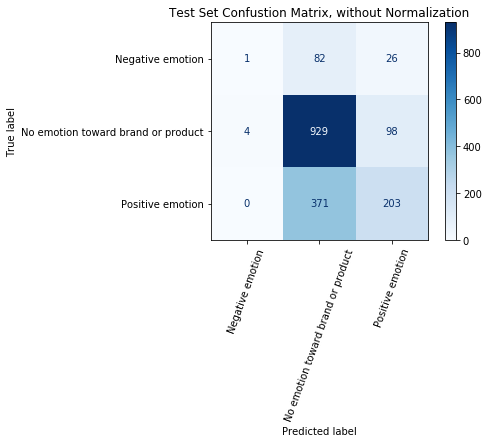

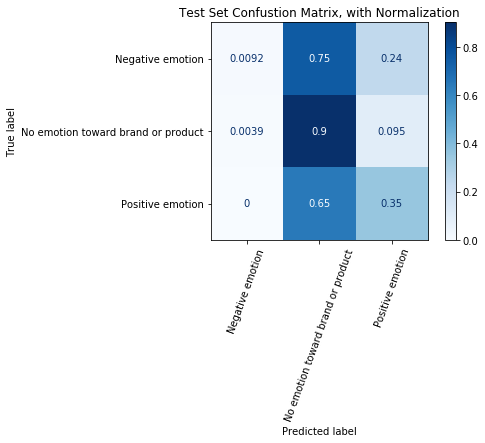

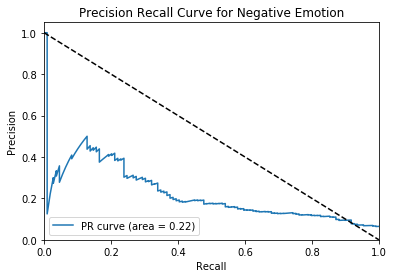

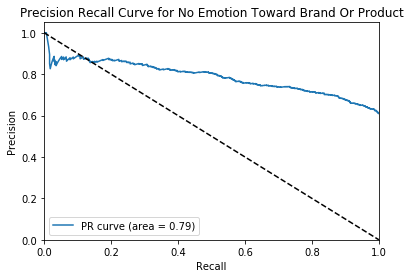

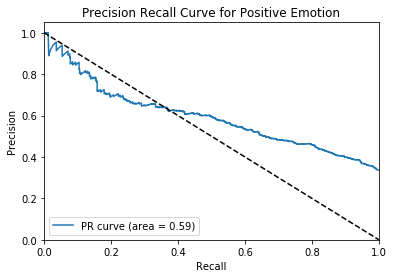

MINIMUM DOCUMENT FREQUENCY = 14

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.86      0.06      0.10       436
No emotion toward brand or product       0.69      0.93      0.79      4124
                  Positive emotion       0.72      0.39      0.51      2295

                          accuracy                           0.70      6855
                         macro avg       0.76      0.46      0.47      6855
                      weighted avg       0.71      0.70      0.65      6855



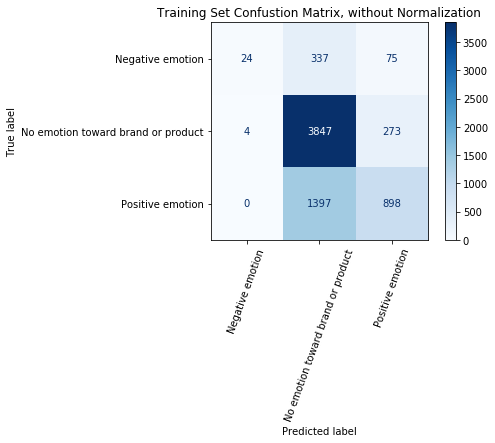

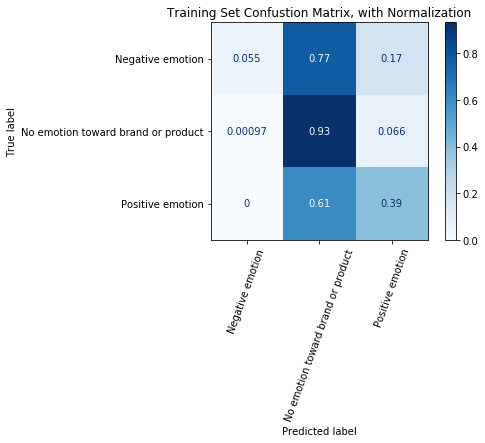

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.20      0.01      0.02       109
No emotion toward brand or product       0.67      0.91      0.77      1031
                  Positive emotion       0.63      0.34      0.44       574

                          accuracy                           0.66      1714
                         macro avg       0.50      0.42      0.41      1714
                      weighted avg       0.63      0.66      0.61      1714



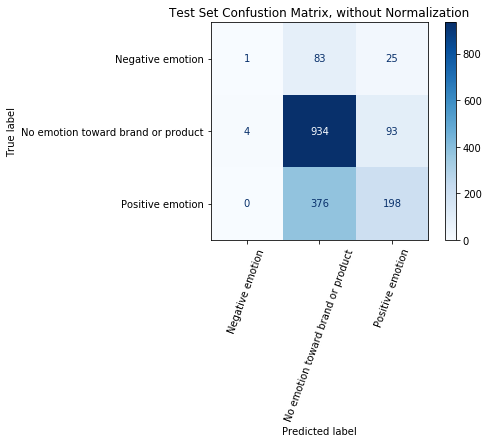

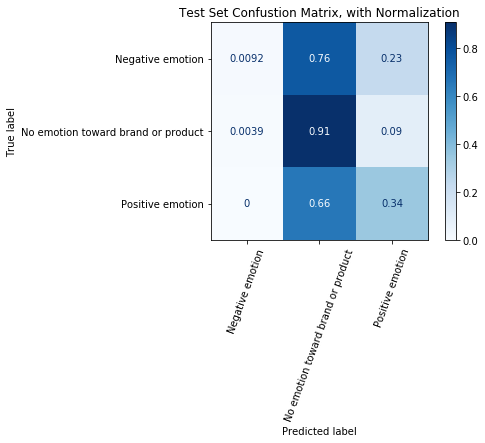

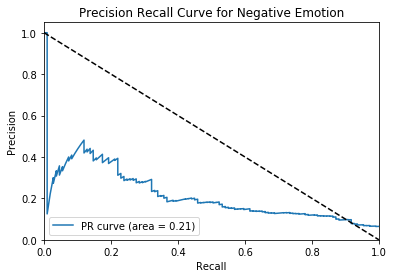

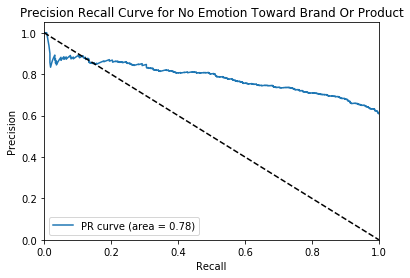

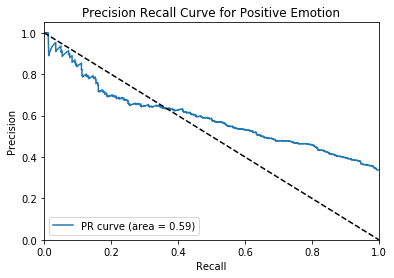

MINIMUM DOCUMENT FREQUENCY = 15

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.86      0.06      0.10       436
No emotion toward brand or product       0.69      0.93      0.79      4124
                  Positive emotion       0.72      0.39      0.51      2295

                          accuracy                           0.70      6855
                         macro avg       0.76      0.46      0.47      6855
                      weighted avg       0.71      0.70      0.65      6855



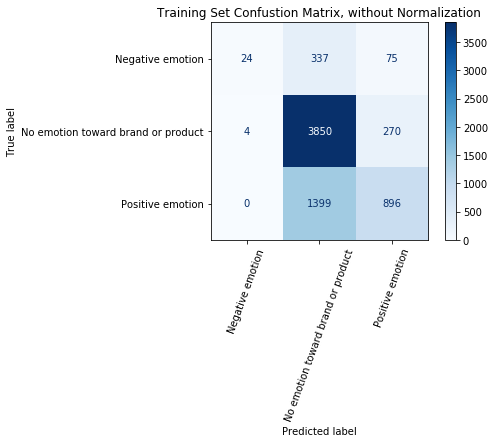

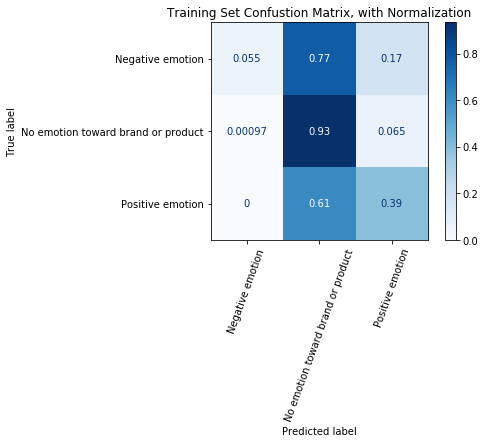

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.20      0.01      0.02       109
No emotion toward brand or product       0.67      0.91      0.77      1031
                  Positive emotion       0.64      0.34      0.44       574

                          accuracy                           0.66      1714
                         macro avg       0.50      0.42      0.41      1714
                      weighted avg       0.63      0.66      0.61      1714



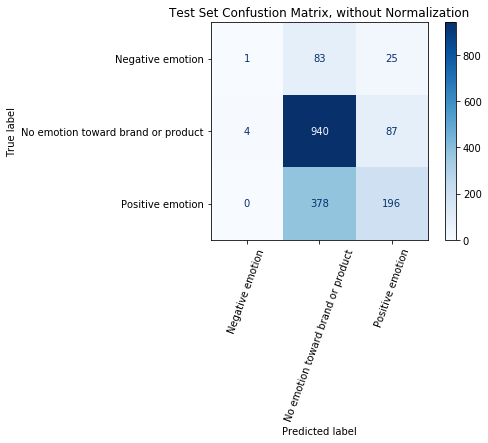

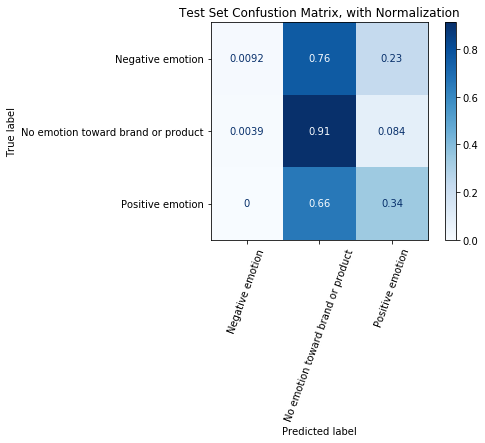

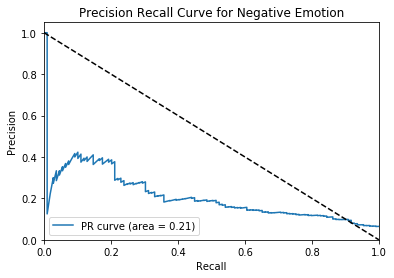

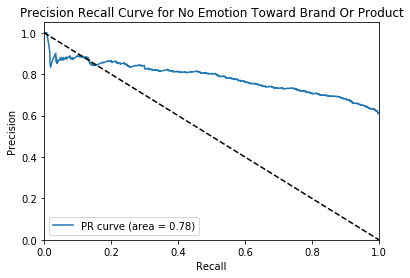

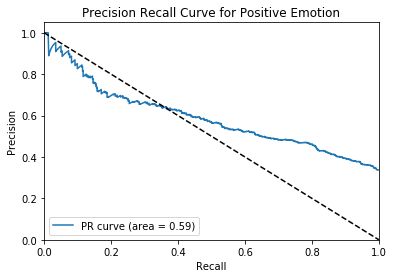

MINIMUM DOCUMENT FREQUENCY = 16

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.85      0.05      0.10       436
No emotion toward brand or product       0.69      0.93      0.79      4124
                  Positive emotion       0.72      0.38      0.50      2295

                          accuracy                           0.69      6855
                         macro avg       0.75      0.46      0.46      6855
                      weighted avg       0.71      0.69      0.65      6855



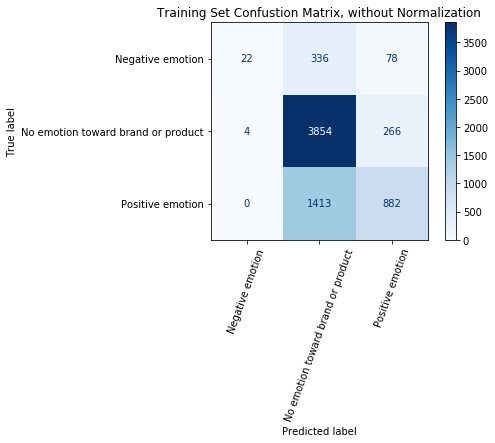

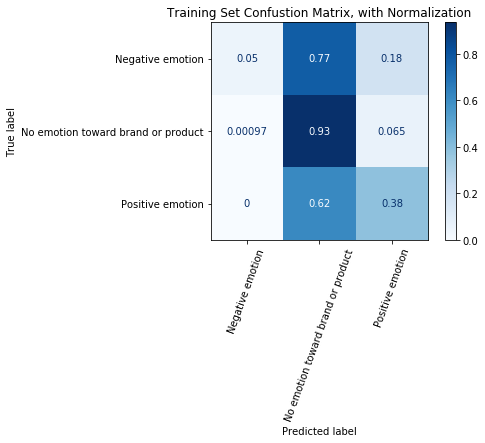

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.17      0.01      0.02       109
No emotion toward brand or product       0.67      0.91      0.77      1031
                  Positive emotion       0.63      0.33      0.44       574

                          accuracy                           0.66      1714
                         macro avg       0.49      0.42      0.41      1714
                      weighted avg       0.62      0.66      0.61      1714



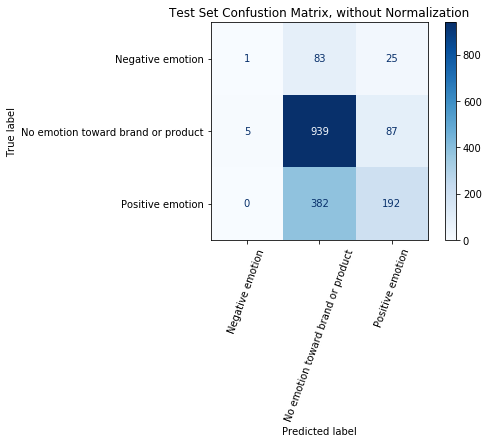

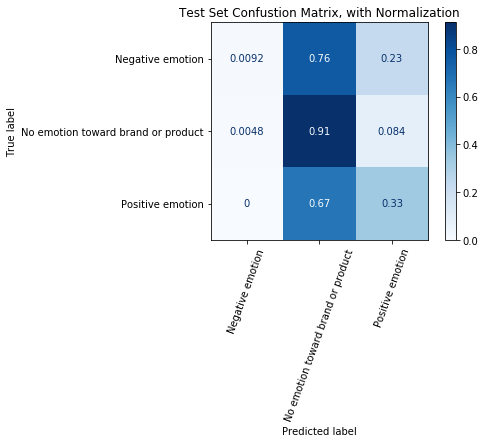

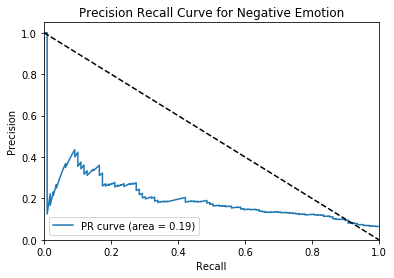

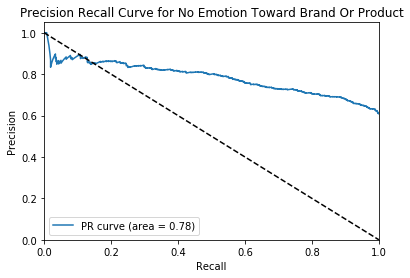

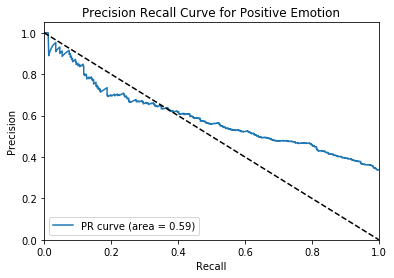

MINIMUM DOCUMENT FREQUENCY = 17

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.85      0.05      0.10       436
No emotion toward brand or product       0.69      0.94      0.79      4124
                  Positive emotion       0.72      0.38      0.50      2295

                          accuracy                           0.69      6855
                         macro avg       0.75      0.46      0.46      6855
                      weighted avg       0.71      0.69      0.65      6855



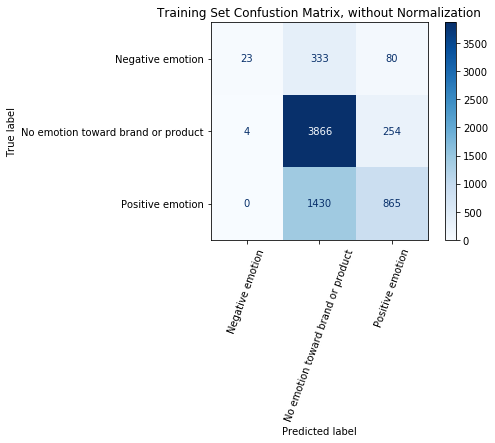

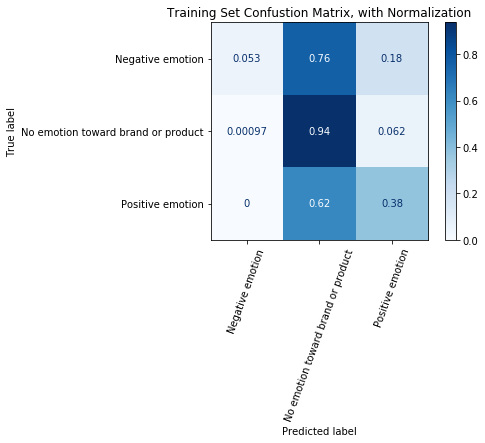

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.20      0.01      0.02       109
No emotion toward brand or product       0.67      0.92      0.77      1031
                  Positive emotion       0.63      0.32      0.43       574

                          accuracy                           0.66      1714
                         macro avg       0.50      0.42      0.41      1714
                      weighted avg       0.63      0.66      0.61      1714



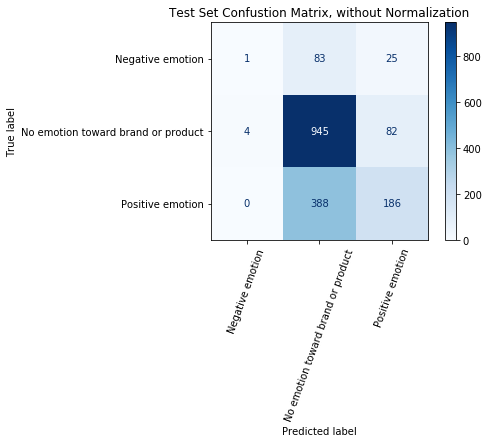

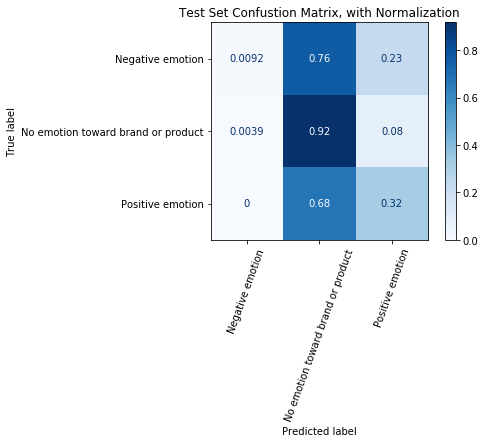

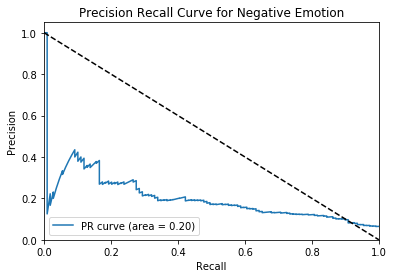

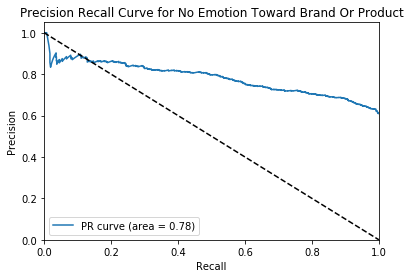

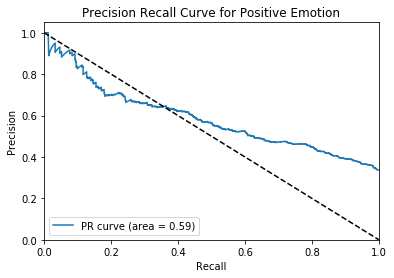

MINIMUM DOCUMENT FREQUENCY = 18

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.85      0.05      0.10       436
No emotion toward brand or product       0.68      0.94      0.79      4124
                  Positive emotion       0.72      0.37      0.49      2295

                          accuracy                           0.69      6855
                         macro avg       0.75      0.45      0.46      6855
                      weighted avg       0.71      0.69      0.65      6855



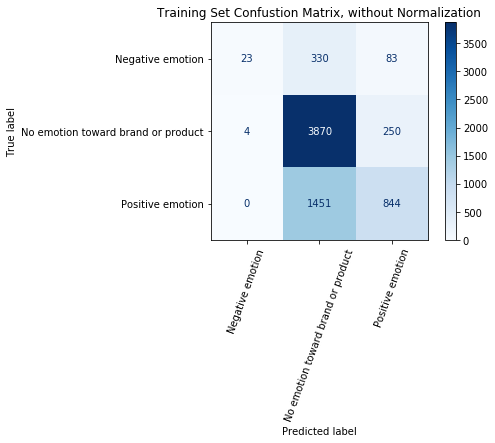

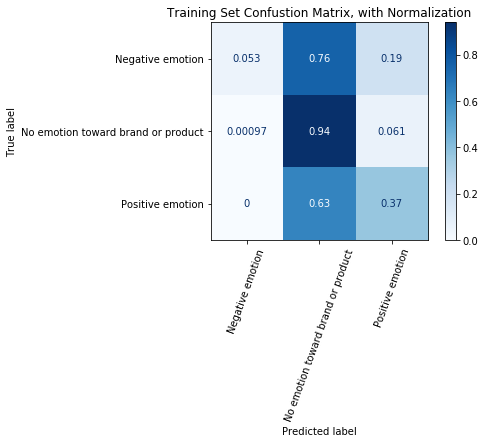

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.20      0.01      0.02       109
No emotion toward brand or product       0.67      0.91      0.77      1031
                  Positive emotion       0.63      0.32      0.43       574

                          accuracy                           0.66      1714
                         macro avg       0.50      0.42      0.40      1714
                      weighted avg       0.62      0.66      0.61      1714



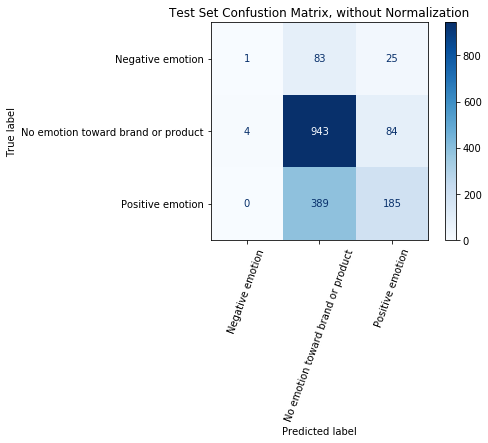

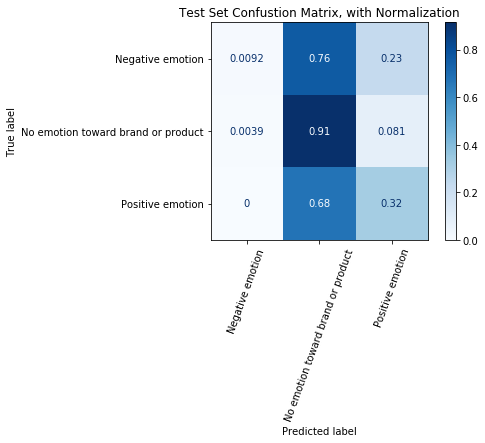

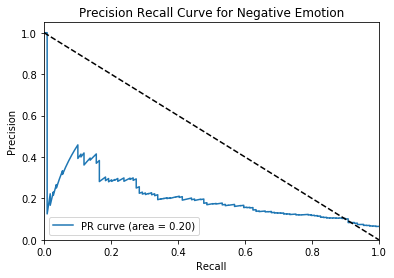

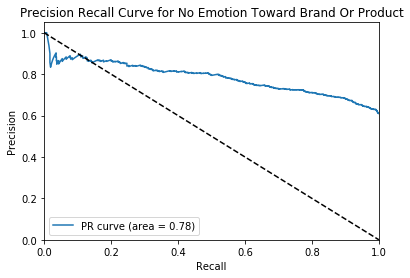

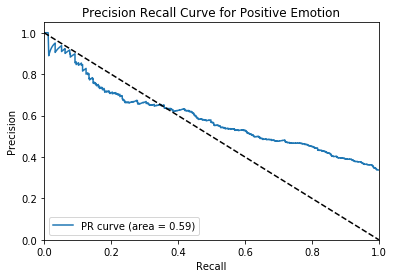

MINIMUM DOCUMENT FREQUENCY = 19

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.85      0.05      0.10       436
No emotion toward brand or product       0.68      0.94      0.79      4124
                  Positive emotion       0.72      0.36      0.48      2295

                          accuracy                           0.69      6855
                         macro avg       0.75      0.45      0.46      6855
                      weighted avg       0.71      0.69      0.64      6855



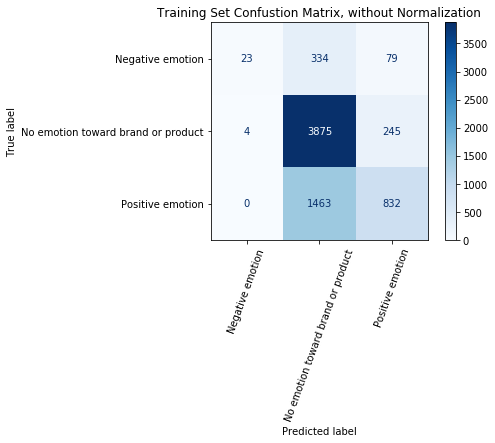

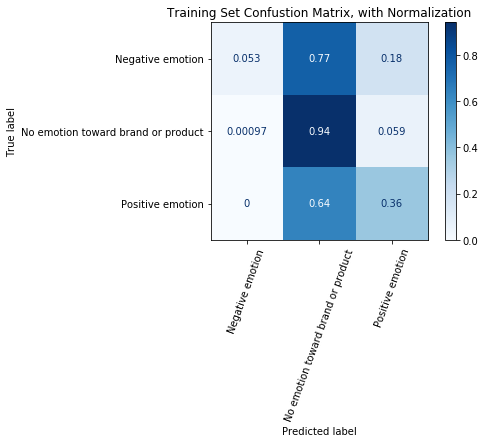

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.17      0.01      0.02       109
No emotion toward brand or product       0.67      0.92      0.77      1031
                  Positive emotion       0.64      0.32      0.43       574

                          accuracy                           0.66      1714
                         macro avg       0.49      0.42      0.41      1714
                      weighted avg       0.63      0.66      0.61      1714



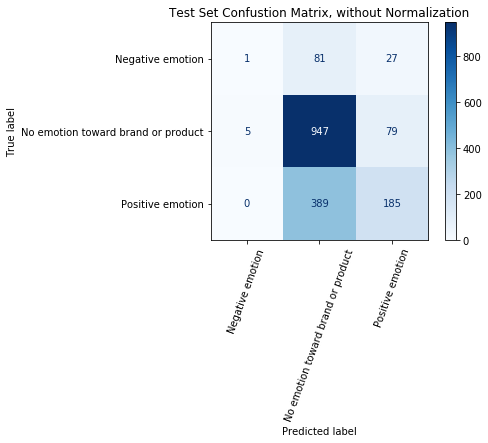

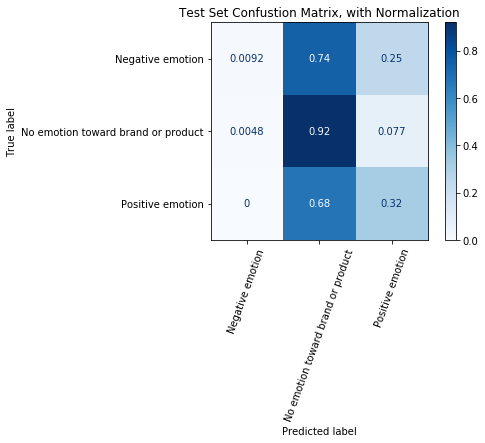

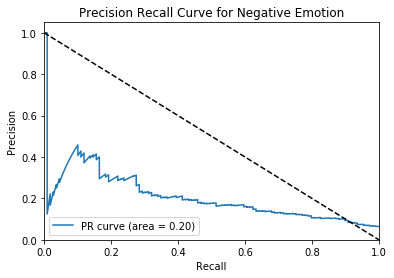

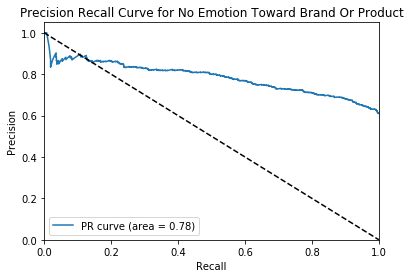

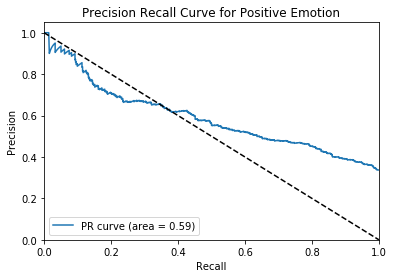

MINIMUM DOCUMENT FREQUENCY = 20

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.86      0.06      0.11       436
No emotion toward brand or product       0.68      0.94      0.79      4124
                  Positive emotion       0.72      0.36      0.48      2295

                          accuracy                           0.69      6855
                         macro avg       0.76      0.45      0.46      6855
                      weighted avg       0.71      0.69      0.64      6855



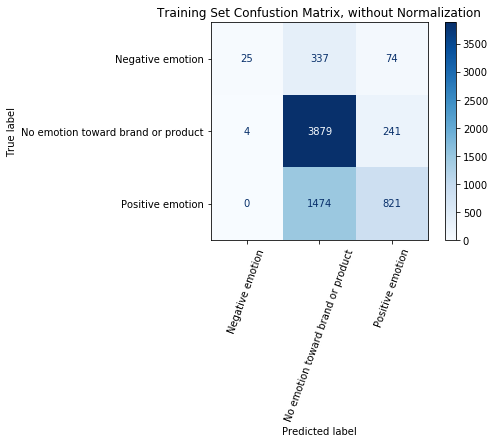

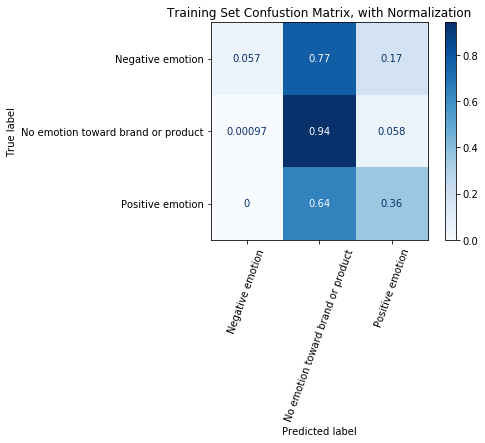

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.20      0.01      0.02       109
No emotion toward brand or product       0.67      0.92      0.77      1031
                  Positive emotion       0.63      0.32      0.42       574

                          accuracy                           0.66      1714
                         macro avg       0.50      0.41      0.40      1714
                      weighted avg       0.63      0.66      0.61      1714



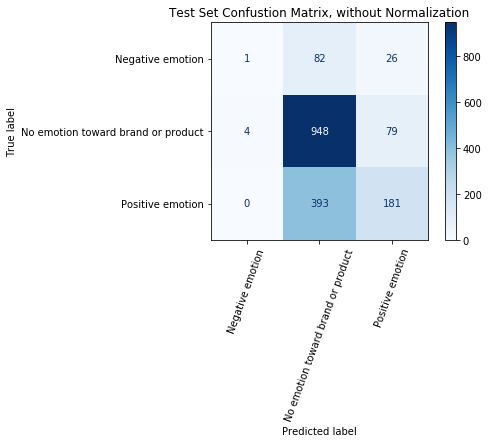

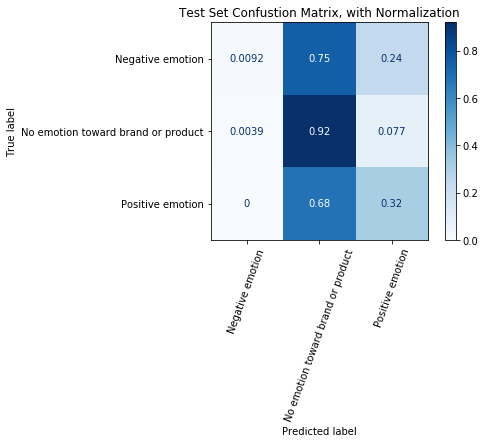

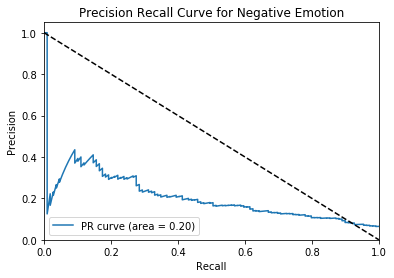

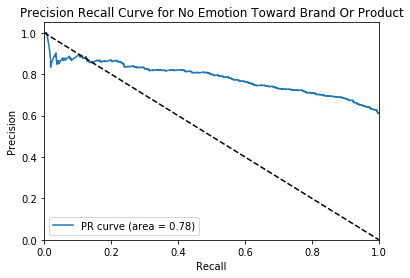

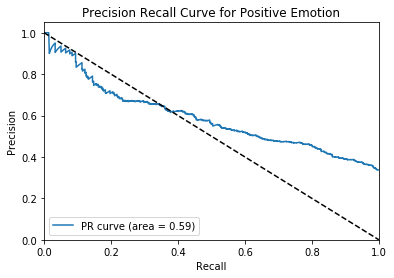

In [18]:
metrics_summary = []

for min_df in range(1,21):
    test_scores = train_and_eval_model(min_df)
    metrics_summary.append(test_scores)

In [19]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                          'neg f1',
                                          'neutral f1',
                                          'pos f1'])

metrics_summary_df

min doc freq  train accuracy  test accuracy    neg f1  neutral f1  \
0            1.0        0.733625       0.654609  0.035714    0.774219   
1            2.0        0.740190       0.662777  0.035714    0.774920   
2            3.0        0.738001       0.666861  0.035398    0.773585   
3            4.0        0.730999       0.668611  0.052632    0.773710   
4            5.0        0.723268       0.666861  0.035398    0.771798   
5            6.0        0.719183       0.672112  0.035398    0.775869   
6            7.0        0.716703       0.668611  0.035398    0.774059   
7            8.0        0.713494       0.670945  0.035398    0.775783   
8            9.0        0.708680       0.669195  0.035398    0.774624   
9           10.0        0.706054       0.668028  0.035398    0.773088   
10          11.0        0.702699       0.665111  0.035398    0.772047   
11          12.0        0.700511       0.665111  0.035088    0.772803   
12          13.0        0.697155       0.661027  0.017544    0.769996   
13          14.0        0.695697       0.661027  0.017544    0.770627   
14          15.0        0.695842       0.663361  0.017544    0.773026   
15          16.0        0.694092       0.660443  0.017391    0.771253   
16          17.0        0.693508       0.660443  0.017544    0.772374   
17          18.0        0.691028       0.658693  0.017544    0.771055   
18          19.0        0.690007       0.661027  0.017391    0.773693   
19          20.0        0.689278       0.659277  0.017544    0.772616   

      pos f1  
0   0.341270  
1   0.410628  
2   0.451539  
3   0.468132  
4   0.470588  
5   0.482759  
6   0.473514  
7   0.476087  
8   0.472252  
9   0.472885  
10  0.461032  
11  0.456763  
12  0.450610  
13  0.444944  
14  0.444444  
15  0.437358  
16  0.429066  
17  0.426267  
18  0.427746  
19  0.420930

MINIMUM DOCUMENT FREQUENCY = 8

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.94      0.07      0.13       436
No emotion toward brand or product       0.71      0.93      0.80      4124
                  Positive emotion       0.74      0.44      0.55      2295

                          accuracy                           0.71      6855
                         macro avg       0.79      0.48      0.49      6855
                      weighted avg       0.73      0.71      0.68      6855



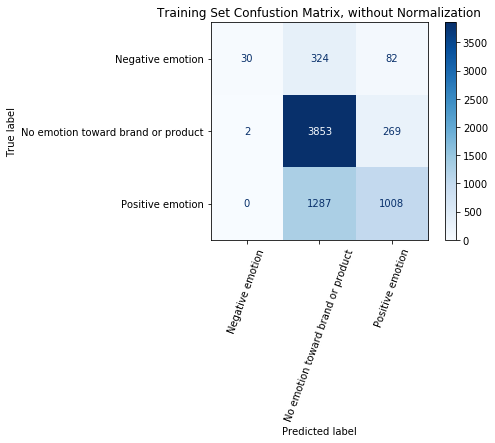

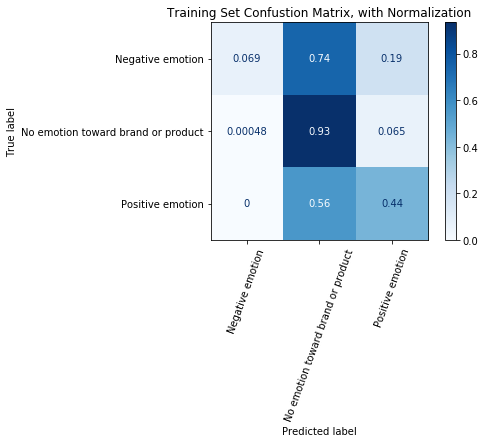

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.50      0.02      0.04       109
No emotion toward brand or product       0.68      0.90      0.78      1031
                  Positive emotion       0.63      0.38      0.48       574

                          accuracy                           0.67      1714
                         macro avg       0.60      0.43      0.43      1714
                      weighted avg       0.65      0.67      0.63      1714



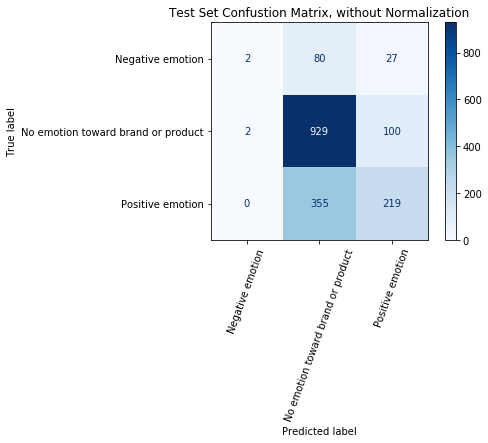

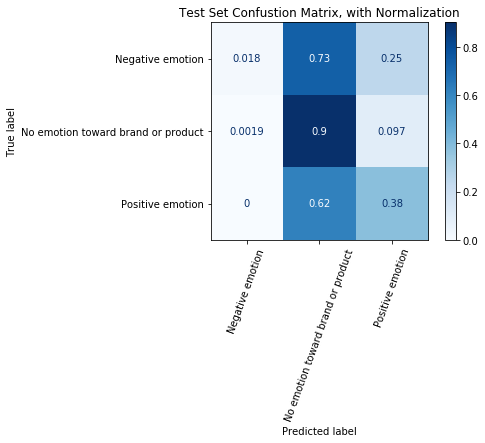

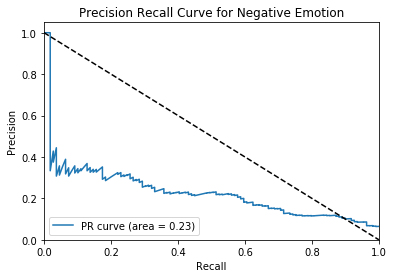

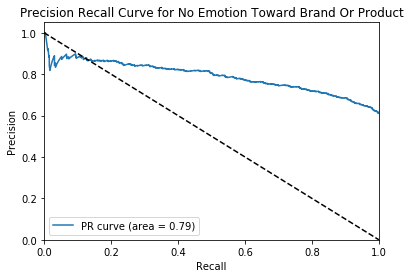

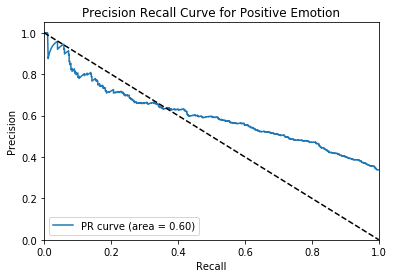

In [21]:
metrics = train_and_eval_model(min_df=8)

# Summary

When adjusting the minimum document frequency for words, the best performing setting was 8, when using the F1 scores and accuracy as metrics.

However this model does the worst so far with the minority class and the F1 score never gets above 0.4.